<center> <img src = https://gde-cashback.ru/wp-content/uploads/2019/06/Keshbek-booking.png alt="drawing" style="width:400px;">

    
    

# Артиков Артур. PROJECT-3. EDA + Feature Engineering


# Этап 1. Загрузка данных и их предварительный анализ



Первым этапом в любом проекте является загрузка данных. Поскольку в данном случае работа над проектом ведется на платформе Kaggle, воспользуемся __модулем os__, чтобы получить список всех предоставленных файлов.


In [258]:
import os

print('Список предоставленных для работы файлов:')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Список предоставленных для работы файлов:
/kaggle/input/sf-booking/hotels_test.csv
/kaggle/input/sf-booking/hotels_train.csv
/kaggle/input/sf-booking/submission.csv


## 1. Описание предоставленных файлов

Для работы были предоставлены следующие файлы:

1. Файл hotels_test.csv, который представляет собой набор данных для обучения

In [259]:
import pandas as pd
import numpy as np

hotels = pd.read_csv('../input/sf-booking/hotels_test.csv')
print('Размерность файла hotels_test.csv - {} строк и {} столбцов'.format(hotels.shape[0], hotels.shape[1]))

Размерность файла hotels_test.csv - 128935 строк и 16 столбцов


2. Файл hotels_train.csv, по которому будет производится оценка качества модели


In [260]:
train = pd.read_csv('../input/sf-booking/hotels_train.csv')
print('Размерность файла hotels_train.csv - {} строк и {} столбцов'.format(train.shape[0], train.shape[1]))

Размерность файла hotels_train.csv - 386803 строк и 17 столбцов


3. Файл сабмишна в нужном формате - submission.csv

In [261]:
submission = pd.read_csv('../input/sf-booking/submission.csv')
print('Размерность файла submission.csv - {} строк и {} столбцов'.format(submission.shape[0], submission.shape[1]))

Размерность файла submission.csv - 128935 строк и 2 столбцов


Дополнительно к описанию файлов, заранее сделаем так, чтобы результаты стали воспроизводимыми, для этого зафиксируем __RANDOM_SEED__, а также сохраним данные о библиотеках в файле __requirements.txt__

In [262]:
RANDOM_SEED = 42 # Воспроизводимость экспериментов
!pip freeze > requirements.txt # фиксация версий пакетов

Тепем разберем каждый файл более подробно. Как видно из проверки размерностей предоставленных файлов, файл hotels_test.csv и файл submission.csv имеют одинаковое количество записей - 128935 строк, что означает, что для получения значений проводилась работа именно с первым файлом. Рассмотрим файл submission.csv поподробнее

In [263]:
submission.head()

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596


In [264]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


Как видно, файл submission.csv - представялет собой файл из двух столбцов, содержащий искомую переменную - reviewer_score, то есть оценку, которую пользователь оставил отелю, а также id - идентефикатор данного ответа. Следовательно вся работа будет сводится к тому, чтобы преобразовать предоставленные признаки и приспособить их для помощи в нахождении верного рейтинга отеля.

In [265]:
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,11/26/2015,8.3,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,3,351,Nice welcoming and service,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520
3,Piazza Della Repubblica 17 Central Station 201...,241,10/17/2015,9.1,Hotel Principe Di Savoia,United States of America,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day,45.479888,9.196298
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,5/16/2016,9.1,Hotel Esther a,United Kingdom,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,"[' Business trip ', ' Solo traveler ', ' Class...",444 day,52.370545,4.888644


In [266]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

Файл hotels_test.csv содержит 16 признаков, среди которых отсутствует искомый признак - reviewer_score, поскольку файл submission.csv был получен именно по этому набору данных.

In [267]:
train.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [268]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

В файле hotels_train.csv у нас есть 17 признаков, среди которых все признаки файла hotels_test.csv и еще один - reviewer_score, который есть в файле submission.csv. 

Чтобы получить модель по всем данным нужно выполнить следующие шаги:

1. Объединить данные из файлов hotels_train.csv и hotels_test.csv - в один общий файл
2. Произвести очистку данных, то есть восстановление пустых значений
3. Провести исследование данных, то есть построить гипотезы, графики, а также предоставить идеи по поводу того, как тот или иной пункт данных влияет на позицию отеля
4. Сгенерировать новые признаки, на основе старых
5. Отобрать из полученных признаков те, которые в большей степени влияют на результат модели
6. Преобразовать признаки в числовые
7. Провести тестирование полученной модели

# Этап 2. Объединение данных

Поскольку файл submission.csv - то, как должно выглядеть предсказание, то для объединения файлов train и test, добавим в файл test колонку с оценками отелей 'reviewer_score', значения которой приравняем к нулю.

In [269]:
hotels['reviewer_score'] = 0
train['sample'] = 1 # помечаем где у нас трейн
hotels['sample'] = 0 # помечаем где у нас тест

data = pd.concat([hotels, train], ignore_index=True).reset_index(drop=True)

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

В полученном датасете 515738 значений, которые будут использованы для того, чтобы построить предсказательную модель. Теперь можно заняться заполнением пропусков и очисткой данных

# Этап 3. Восстановление пустых значений в данных

Необходимо узнать о топ, какие столбцы имеют пропуски, для этого выполним нижеследующий код:

In [271]:
cols_with_null = data.isnull().mean() * 100 # Считаем среднее число пропусков
cols_with_null_result = cols_with_null[cols_with_null>0].sort_values(ascending=False)
display(cols_with_null_result)

lat    0.633655
lng    0.633655
dtype: float64

По полученному результату удалось узнать, что пропуски имеются только в двух столбцах - столбцах с данными о широте и долготе - lat и lng соответственно. Поскольку значения широты и долготы являются уникальными для каждого объекта, то нельзя производить замену пропущенных данных средним, или мединой. Для заполнения данных воспользуемся библиотекой Geocoder

Для начала выведем все строки в Датафрейме, значения широты и долготы в которых не заполнены, для этого воспользуемся функцией isnull()

In [272]:
incomplete_data = data[data['lng'].isnull() | data['lat'].isnull()]
print('Всего записей с пропущенным значением широты или долготы - {} штук'.format(incomplete_data.shape[0]))

Всего записей с пропущенным значением широты или долготы - 3268 штук


Теперь выведем только уникальные названия отелей, записей о широте или долготе которых у нас нет, среди неполных записей.

In [273]:
print('Число уникальных отелей, информации о широте и долготе которых нет - {}'.format(incomplete_data['hotel_name'].nunique()))

Число уникальных отелей, информации о широте и долготе которых нет - 17


То есть нам стало известно, что у нас нет данных только о 17 отелях, значит нет необходимость заполнять все 3268 пропущенных значений, достаточно просто найти широту и долготу для 17 отелей, а затем заменить все пропущенные значения в записях с данными отелями.

In [274]:
hotels_without_cords = incomplete_data['hotel_name'].unique()
print('Список отелей с отсутствующей информацией о широте или долготе - \n{}'.format(hotels_without_cords))

Список отелей с отсутствующей информацией о широте или долготе - 
['Hotel Atlanta' 'City Hotel Deutschmeister'
 'Holiday Inn Paris Montmartre' 'Fleming s Selection Hotel Wien City'
 'Hotel City Central' 'Cordial Theaterhotel Wien'
 'NH Collection Barcelona Podium' 'Hotel Daniel Vienna'
 'Maison Albar Hotel Paris Op ra Diamond'
 'Mercure Paris Gare Montparnasse' 'Hotel Pension Baron am Schottentor'
 'Austria Trend Hotel Schloss Wilhelminenberg Wien'
 'Renaissance Barcelona Hotel'
 'Derag Livinghotel Kaiser Franz Joseph Vienna' 'Roomz Vienna'
 'Hotel Park Villa' 'Hotel Advance']


Теперь подключим библиотеку geocoder, чтобы найти координаты отелей. Для хранения данных создадим словарь, ключем в котором будут названия отелей, а значением - список из широты и долготы данного отеля ['lat', 'lng']

In [275]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Artur")

cords_of_hotels = dict()
for hotel in hotels_without_cords:
    try:
        location = geolocator.geocode(hotel)
        lat = location.latitude
        lng = location.longitude
        cords_of_hotels[hotel] = [lat, lng]
    except:
        cords_of_hotels[hotel] = []
display(cords_of_hotels)


{'Hotel Atlanta': [50.8520697, 4.354408380443903],
 'City Hotel Deutschmeister': [],
 'Holiday Inn Paris Montmartre': [48.8716034, 2.3435792],
 'Fleming s Selection Hotel Wien City': [],
 'Hotel City Central': [48.2135658, 16.3799212],
 'Cordial Theaterhotel Wien': [48.20966395, 16.35142625097432],
 'NH Collection Barcelona Podium': [41.39188235, 2.1779639552623635],
 'Hotel Daniel Vienna': [48.1888627, 16.3838516356697],
 'Maison Albar Hotel Paris Op ra Diamond': [],
 'Mercure Paris Gare Montparnasse': [],
 'Hotel Pension Baron am Schottentor': [],
 'Austria Trend Hotel Schloss Wilhelminenberg Wien': [48.2196753, 16.2854959],
 'Renaissance Barcelona Hotel': [41.3927154, 2.1674921],
 'Derag Livinghotel Kaiser Franz Joseph Vienna': [],
 'Roomz Vienna': [48.222974, 16.393313],
 'Hotel Park Villa': [49.13646555, 9.230946491810585],
 'Hotel Advance': [27.6864903, 85.3313641]}

После выполнения поиска, через библиотеку Geocoder, осталось всего 6 отелей, координаты которых не удалось найти. Для этих отелей, найдем их адреса в интернете, а затем выполним поиск также через библиотеку geocoder.

In [276]:
# Список адресов отелей, найденных в сети интернет:
adresses = {'City Hotel Deutschmeister': 'Grünentorgasse 30, 1090 Wien',
'Fleming s Selection Hotel Wien City': 'Josefstädter Str. 10-12, 1080 Wien',
'Maison Albar Hotel Paris Op ra Diamond': '4 Rue de la Pépinière, 75008 Paris',
'Mercure Paris Gare Montparnasse': '40 Rue du Commandant René Mouchotte, 75014 Paris',
'Hotel Pension Baron am Schottentor': 'Währinger Str. 12, 1090 Wien',
'Derag Livinghotel Kaiser Franz Joseph Vienna': 'Sieveringer Str. 4, 1190 Wien'}
            
for hotel in cords_of_hotels:
    if len(cords_of_hotels[hotel]) == 0:
        hotel_ads = adresses[hotel]
        try:
            location = geolocator.geocode(hotel_ads)
            lat = location.latitude
            lng = location.longitude
            cords_of_hotels[hotel] = [lat, lng]
        except:
            cords_of_hotels[hotel] = []
    else:
        continue
        
display(cords_of_hotels)

        

{'Hotel Atlanta': [50.8520697, 4.354408380443903],
 'City Hotel Deutschmeister': [48.2208351, 16.366645],
 'Holiday Inn Paris Montmartre': [48.8716034, 2.3435792],
 'Fleming s Selection Hotel Wien City': [48.2108117, 16.3422031],
 'Hotel City Central': [48.2135658, 16.3799212],
 'Cordial Theaterhotel Wien': [48.20966395, 16.35142625097432],
 'NH Collection Barcelona Podium': [41.39188235, 2.1779639552623635],
 'Hotel Daniel Vienna': [48.1888627, 16.3838516356697],
 'Maison Albar Hotel Paris Op ra Diamond': [48.875248, 2.3233746],
 'Mercure Paris Gare Montparnasse': [48.83788835, 2.31836851875],
 'Hotel Pension Baron am Schottentor': [48.216699, 16.3600609],
 'Austria Trend Hotel Schloss Wilhelminenberg Wien': [48.2196753, 16.2854959],
 'Renaissance Barcelona Hotel': [41.3927154, 2.1674921],
 'Derag Livinghotel Kaiser Franz Joseph Vienna': [48.2528586, 16.3179651],
 'Roomz Vienna': [48.222974, 16.393313],
 'Hotel Park Villa': [49.13646555, 9.230946491810585],
 'Hotel Advance': [27.68649

После поиска широты и долготы по адресу, не осталось пропущенных значений. Теперь можно заполнить все пропущенные значения широты и долготы в основных данных

In [277]:
import warnings

warnings.filterwarnings('ignore')

for i in range(data.shape[0]):
    hotel_name = data['hotel_name'].iloc[i]
    if hotel_name in cords_of_hotels:
        data['lat'].iloc[i] = cords_of_hotels[hotel_name][0]
        data['lng'].iloc[i] = cords_of_hotels[hotel_name][1]
    else:
        continue


После заполнения данных, вновь проведем поиск пропущенных значений, чтобы узнать, прошло ли заполнение удачно

In [278]:
cols_with_null = data.isnull().mean() * 100 # Считаем среднее число пропусков
cols_with_null_result = cols_with_null[cols_with_null>0].sort_values(ascending=False)
display(cols_with_null_result)

Series([], dtype: float64)

После повторного поиска пропущенных значений, результатом оказался пустой Series-объект, это значит, что все пропущенные значения были восстановлены и в наших данных больше не осталось пропусков

После заполнения пропущенных значений, узнаем, чему равно среднее значение в каждом из столбцов

In [279]:
print('Среднее значение широты - {}'.format(round(data['lat'].mean(), 6)))
print('Среднее значение долготы - {}'.format(round(data['lng'].mean(), 6)))

Среднее значение широты - 49.433758
Среднее значение долготы - 2.888078


# Этап 4. Исследование данных

## Часть 1. Визуальный анализ данных

Для того чтобы проследить те, или иные закономерности в наших данных, необходимо провести визуальный анализ, а затем подкрепить гипотезы разведывательным анализом данных. Первым делом выведем информацию о данных, а также о количестве уникальных значений в каждом столбце.

In [280]:
print('Информация о всех данных')
data.info()

Информация о всех данных
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             5

In [281]:
print('Информация об уникальных значениях в каждом столбце')
data.nunique(dropna=True)

Информация об уникальных значениях в каждом столбце


hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
tags                                           55242
days_since_review                                731
lat                                             1489
lng                                             1489
reviewer_score                                    38
sample                                             2
dtype: int64

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

Все признаки можно разделить на строковые и числовые, для представленных данных 
* строковые: hotel_address, review_date, hotel_name, reviewer_nationality, negative_review, positive_review, tags, days_since_review
* числовые: additional_number_of_scoring, average_score,  review_total_negative_word_counts, total_number_of_reviews, review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given, lat, lng, reviewer_score, sample

Сразу же учтем, что sample - это показатель введенный нами для того, чтобы отделить строки из файла train.csv от test.csv, поэтому анализ этого признака не даст нам ничего. Начнем наш анализ со столбца review_date

### Визуализация 1 - распределение отзывов по датам их выкладки (по годам, месяцам и дням)

In [283]:
# импортируем библиотеки для визуализации
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [284]:
# Разделим строковое значение даты на 3 числовых значения - года, месяца и дня публикации отзыва соответственно
data['year_of_review'], data['month_of_review'],  data['day_of_review'] = pd.to_datetime(data['review_date']).dt.year, \
pd.to_datetime(data['review_date']).dt.month, pd.to_datetime(data['review_date']).dt.day

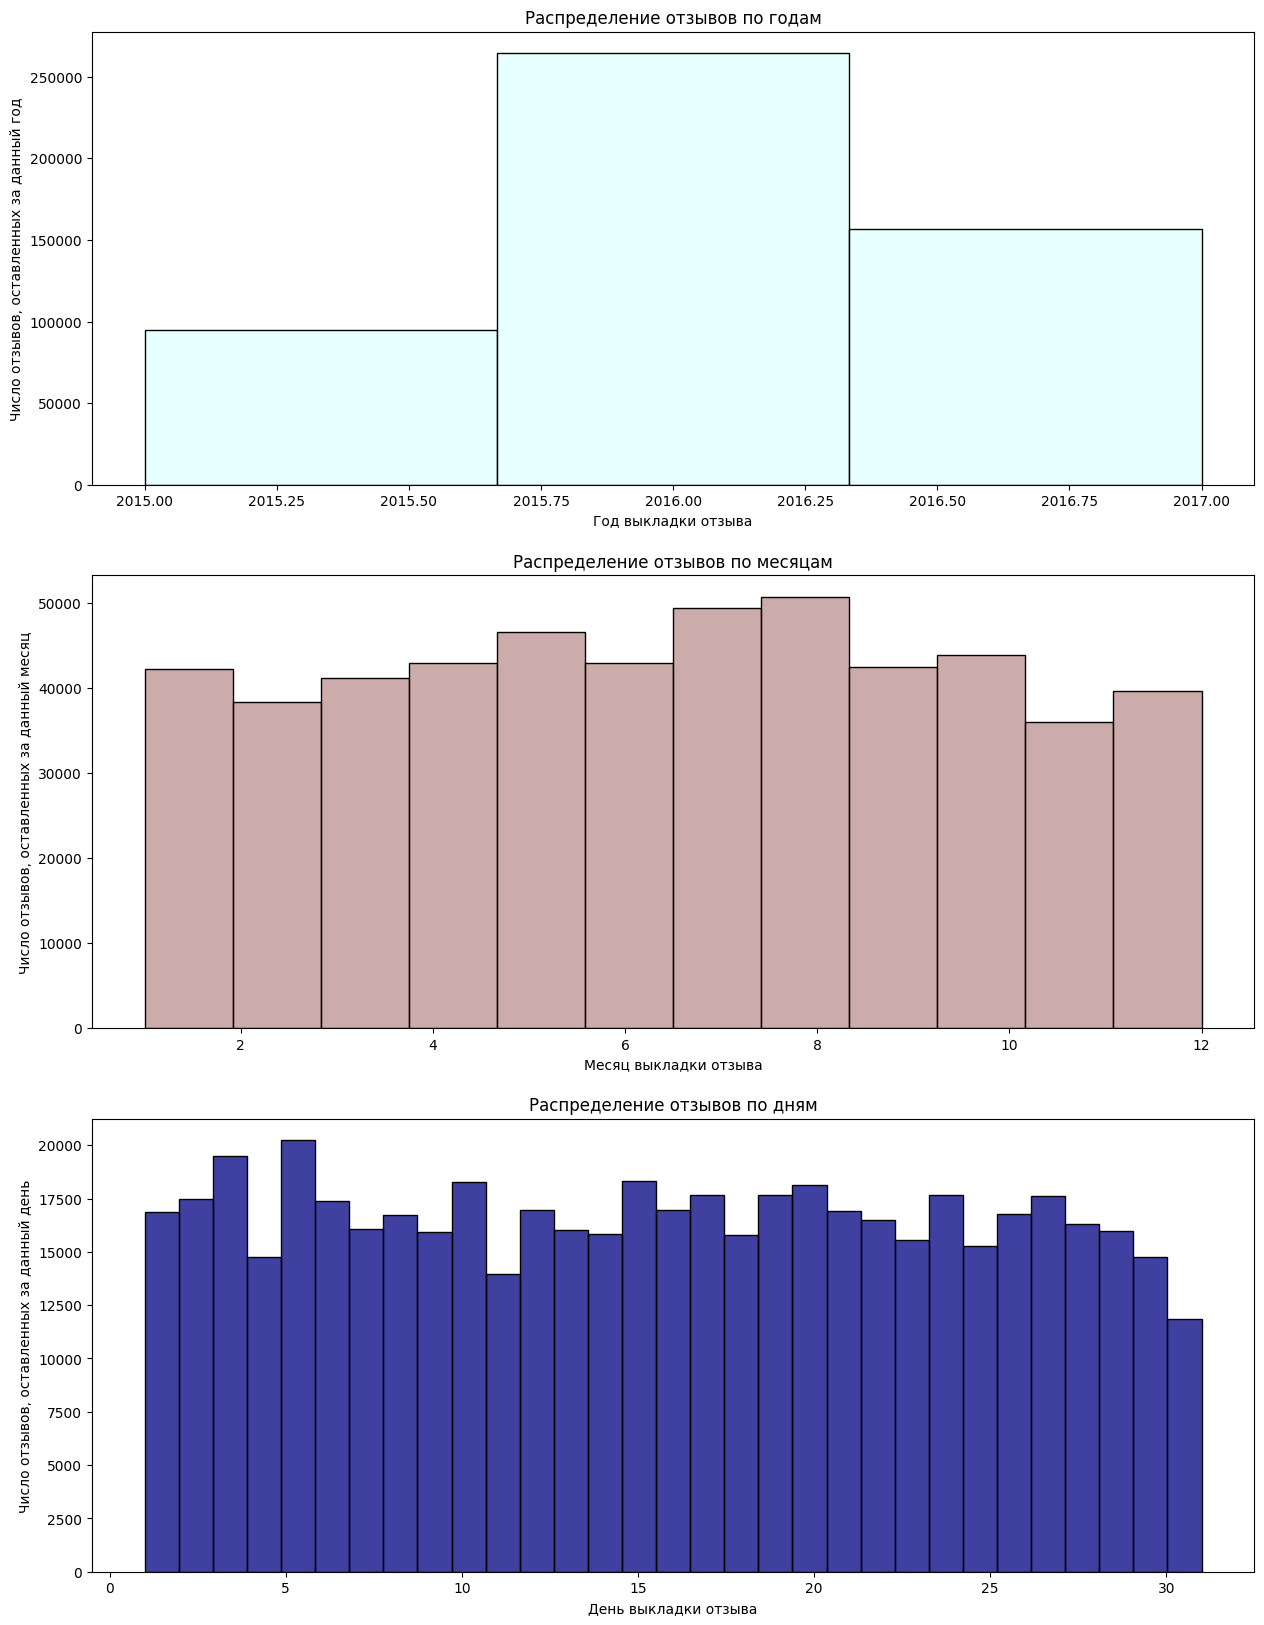

In [285]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

histplot1 = sns.histplot(x=data['year_of_review'], bins=3, ax=axes[0], color='#E0FFFF');
histplot1.set_xlabel('Год выкладки отзыва');
histplot1.set_ylabel('Число отзывов, оставленных за данный год');
histplot1.set_title('Распределение отзывов по годам');

histplot2 = sns.histplot(data['month_of_review'], bins=12, ax=axes[1], color='#BC8F8F');
histplot2.set_xlabel('Месяц выкладки отзыва');
histplot2.set_ylabel('Число отзывов, оставленных за данный месяц');
histplot2.set_title('Распределение отзывов по месяцам');

histplot3 = sns.histplot(data['day_of_review'], bins=31, ax=axes[2], color='navy');
histplot3.set_xlabel('День выкладки отзыва');
histplot3.set_ylabel('Число отзывов, оставленных за данный день');
histplot3.set_title('Распределение отзывов по дням');

data = data.drop(['year_of_review', 'month_of_review', 'day_of_review'], axis=1) # Восстанавливаем датафрейм до исходного состояния

#### Выводы по визуализации 1

После разделения дат публикации отзывов, удалось узнать следующее:
1. В статистике по годам наибольшее число отзывов было оставлено в 2016 году, на втором месте - 2017 год и наименьшее число отзывов было выложено в 2015 году.
2. Для статистики по месяцам характерна прямая связь с сезоном отпусков. Наибольшее число отзывов публиковались в мае, июле и августе, также достаточно большое их число приходится на октябрь (так называемое время бархатного сезона для теплых стран). В это время происходит публикация наибольшего числа отзывов, поскольку люди чаще посещают другие страны, или занимаются внутренним туризмом, в следствие чего отели сталкиваются с большей загруженностью гостями, что и является причиной появления большего числа отзывов.
3. Статистика по дням также имеет достаточно интересные и наглядные результаты. Так наибольшее число отзывов выклажываются 5-го и 3-его числа. Помимо этого каждый пятый день - 10, 15, 20, 25 также являются днями повышенной выкладки отзывов. Возможно это связано с внутренней системой обработки отзывов компании, которая обрабатывает отзывы каждое 5-ое число месяца.

По итогу первой визуализации __можно предположить__, что дата является важным фактором для оценки отеля, однако важность данной метрики относительно остальных удастся узнать только во время разведывательного анализа данных.

### Визуализация 2 - распределение отзывов по национальностям отзывающихся

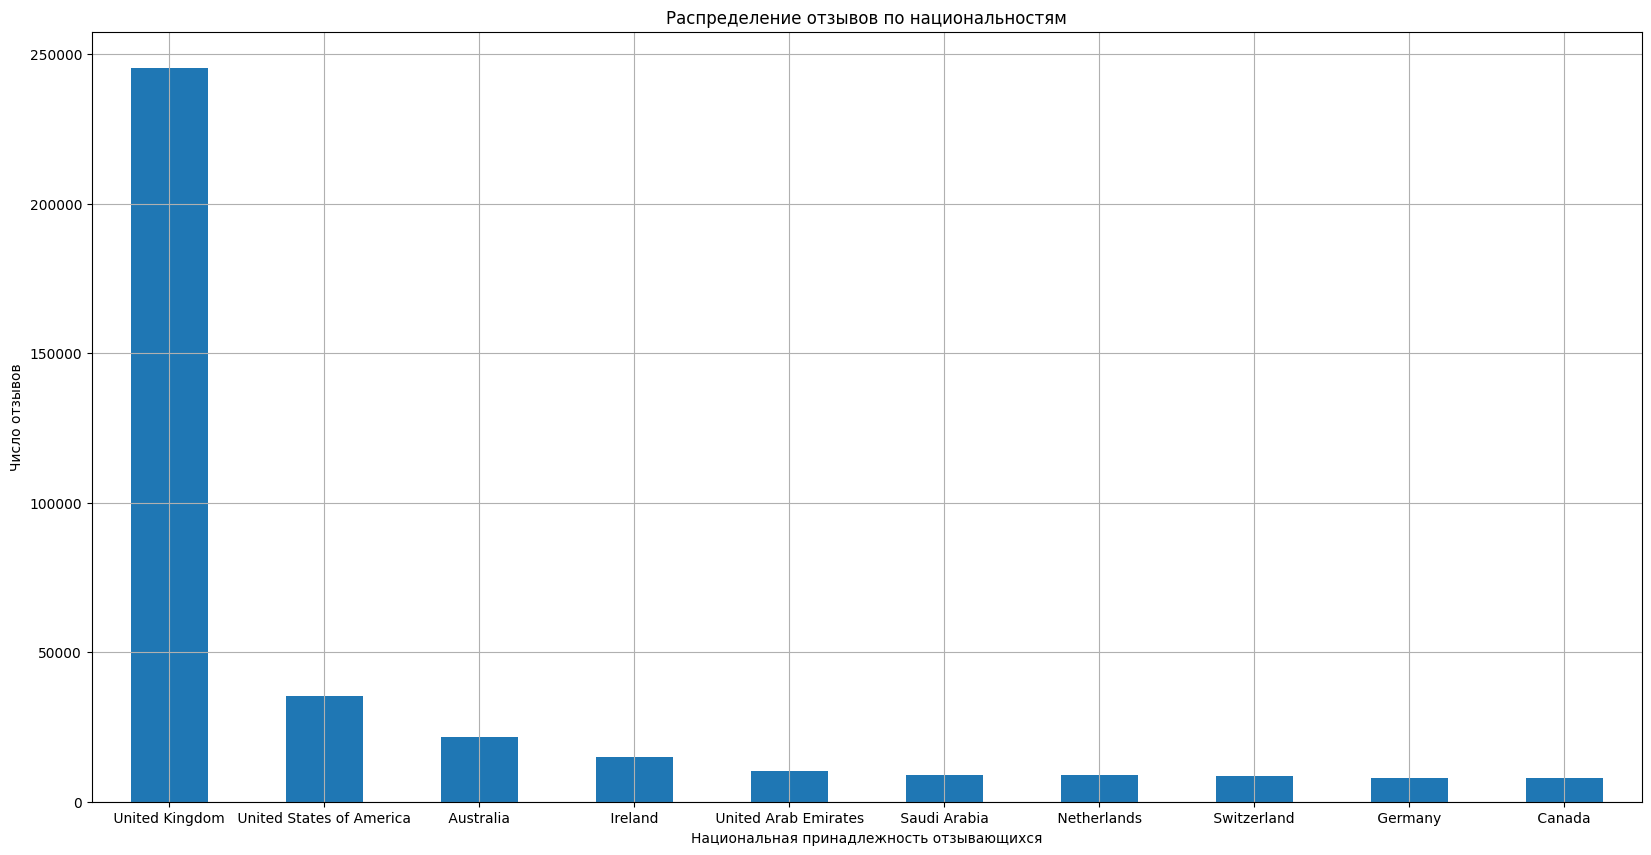

In [286]:
nation_data = data.groupby('reviewer_nationality')['hotel_name'].count()
nation_data = nation_data.nlargest(10)
nation_data.plot(
    kind='bar',
    figsize=(20, 10),
    title='Распределение отзывов по национальностям',
    grid=True,
    xlabel = 'Национальная принадлежность отзывающихся',
    ylabel = 'Число отзывов',
    rot = ('horizontal')
);

#### Выводы по визуализации 2

Как видно из столбчатой диаграммы, наибольшее число отзывов предоставили граждане Соединенного Королевства, на втором месте по числу - граждане США, на третьем - Австралия. В целом можно сказать, что данный признак также имеет влияние на отзыв, однако наличие 227 различных уникальных значений национальностей может мешать четкой работе модели, поэтому в последующем все страны, число отзывов в которых менее 10000 (2% от общего числа отзывов) будут заменены на "other", чтобы не помешать предсказательной модели.

### Визуализация 3 - распределение негативных и позитивных отзывов по числу слов в них

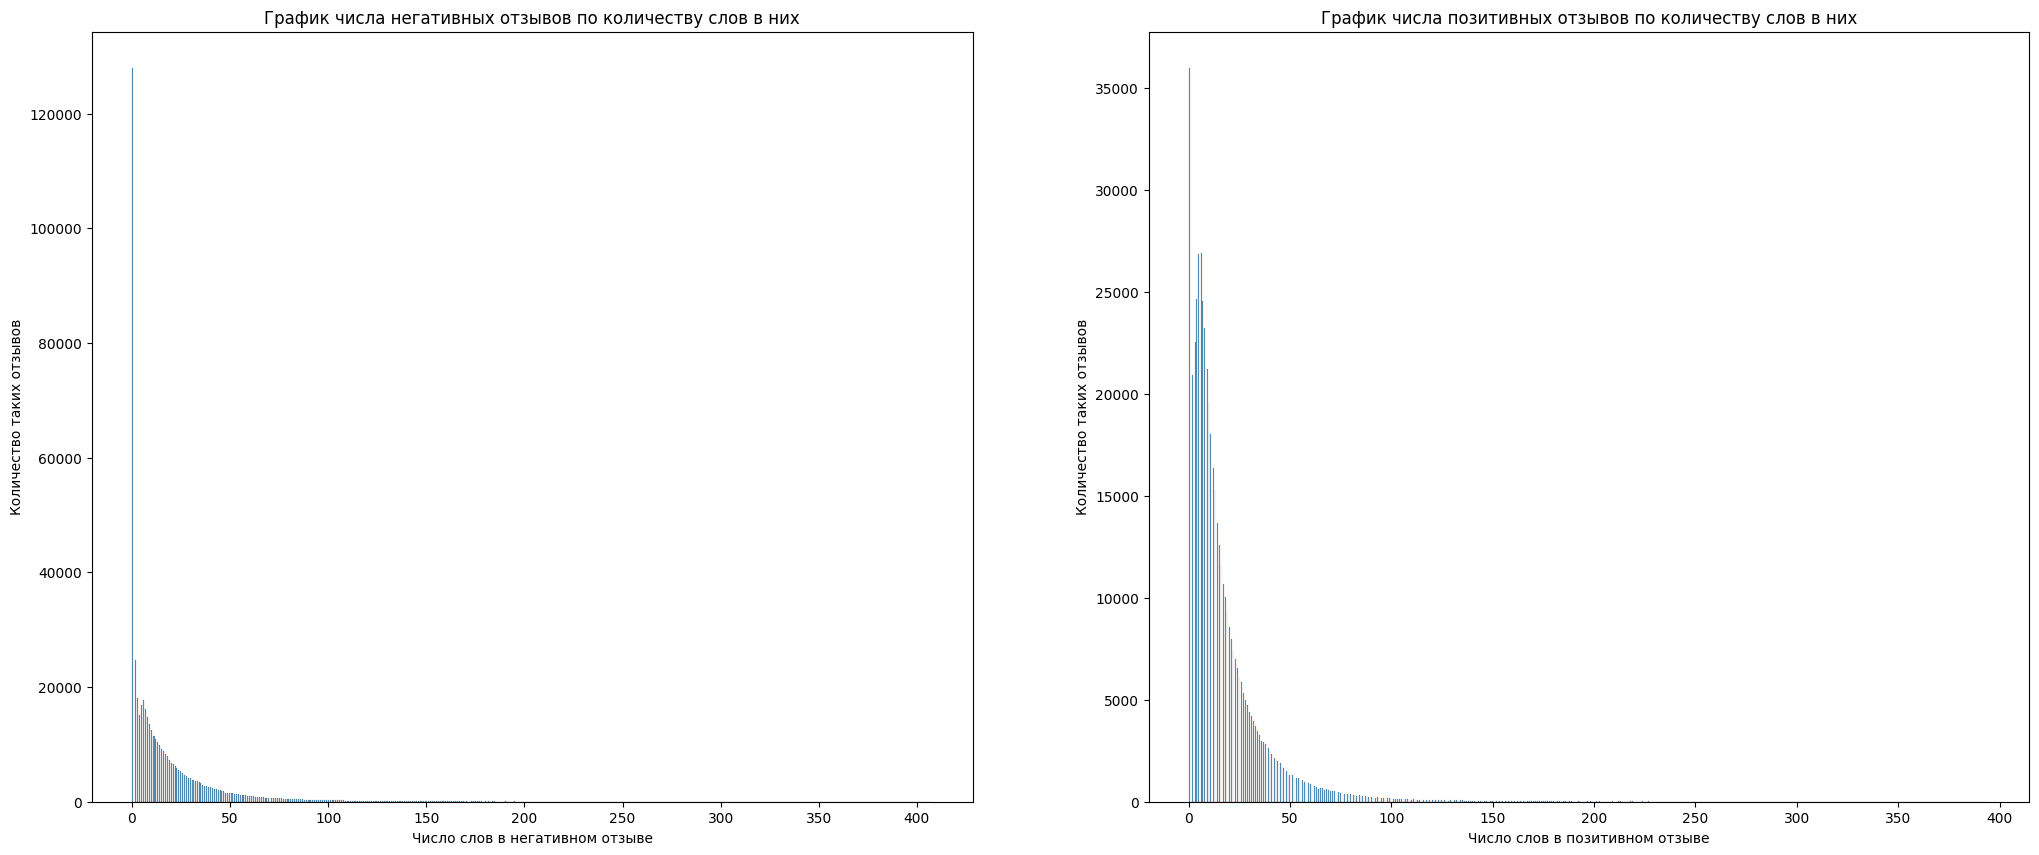

In [287]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 10));
histplot1 = sns.histplot(data = data, x='review_total_negative_word_counts', ax=axes[0]);
histplot1.set_xlabel('Число слов в негативном отзыве');
histplot1.set_ylabel('Количество таких отзывов');
histplot1.set_title("График числа негативных отзывов по количеству слов в них");

histplot2 = sns.histplot(data = data, x='review_total_positive_word_counts', ax=axes[1]);
histplot2.set_xlabel('Число слов в позитивном отзыве');
histplot2.set_ylabel('Количество таких отзывов');
histplot2.set_title("График числа позитивных отзывов по количеству слов в них");

#### Выводы по визуализации 3

Визуализация числа негативных и позитивных отзывов по числу слов в них открыло перед нами дополнительную информацию. В обеих группах наибольшее количество записей - это записи с 0 слов. Однако в случае с негативными отзывами более 120.000 негативных отзывов не содержали ни одного слова, в то время как среди позитивных отзывов количество таковых - чуть более 35.000 штук. Также по графикам легко отследить, что при оставлении позитивного отзыва люди пишут большее количество слов, чем при оставлении негативного. Можно предположить, что число слов в позитивном отзыве куда больше влияет на итоговую оценку, чем число слов в негативном отзыве.

### Визуализация 4 - распределение отзывающихся по числу данных ими отзывов

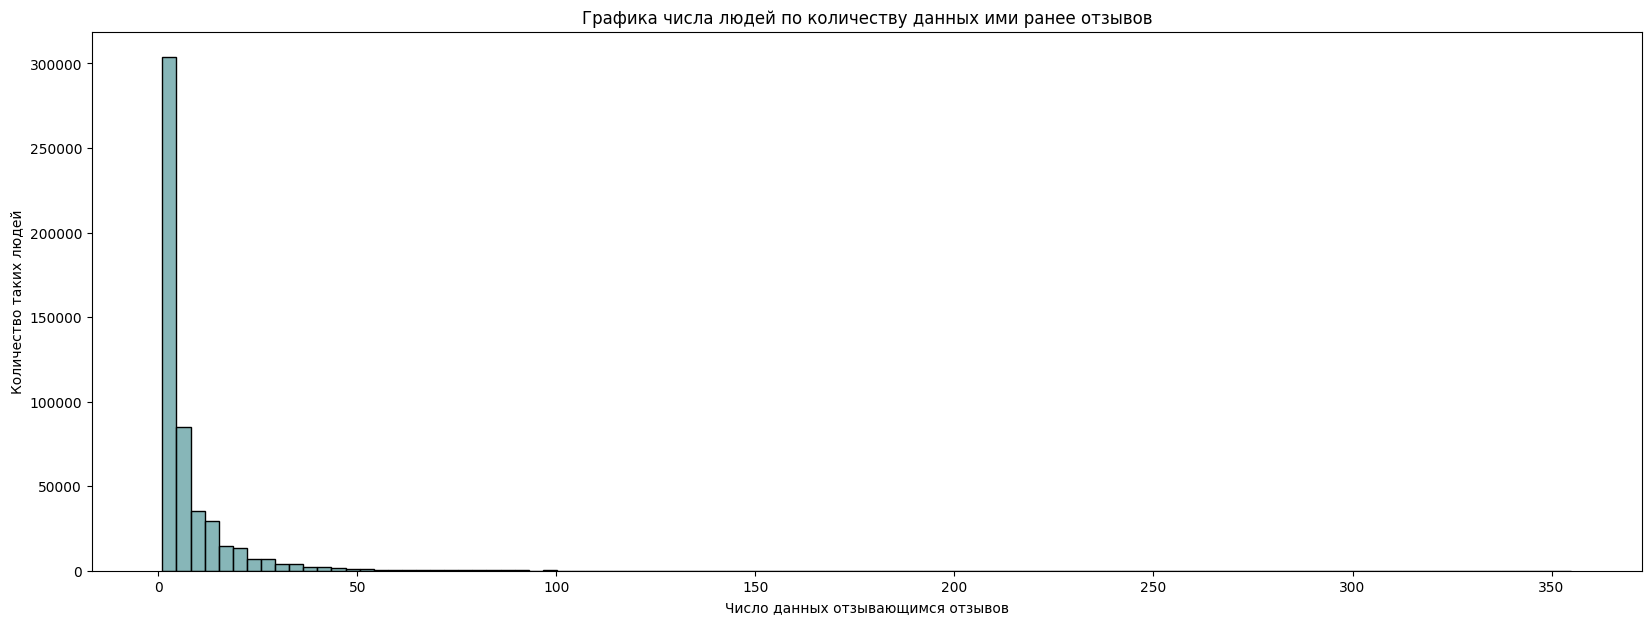

In [288]:
fig = plt.figure(figsize=(20, 7));
hist = sns.histplot(data = data, x = 'total_number_of_reviews_reviewer_has_given', color='cadetblue', bins=100);
hist.set_xlabel('Число данных отзывающимся отзывов');
hist.set_ylabel('Количество таких людей');
hist.set_title('Графика числа людей по количеству данных ими ранее отзывов');

#### Выводы по визуализации 4

Еще один важный признак - число отзывов, данных ранее отзывающимся. Можно предположить, что чем больше отзывов было дано тем, или иным человеком, тем выше качество его оценки. По графику видно, что более 60% отзывающихся ранее дали только 1 отзыв. Это также может означать, что среди отзывающихся есть какая-то часть накрученных отзывов, поскольку дать 1 отзыв и уйти с площадки - достаточно нелогично. Возможно этот признак поможет в определении того, накрученный перед нами отзыв, или нет, при использовании его совместно с числом слов в позитивном и негативном отзывах.

### Визуализация 5 - взаимосвязь оценки данной отелю и числа данных отзывов

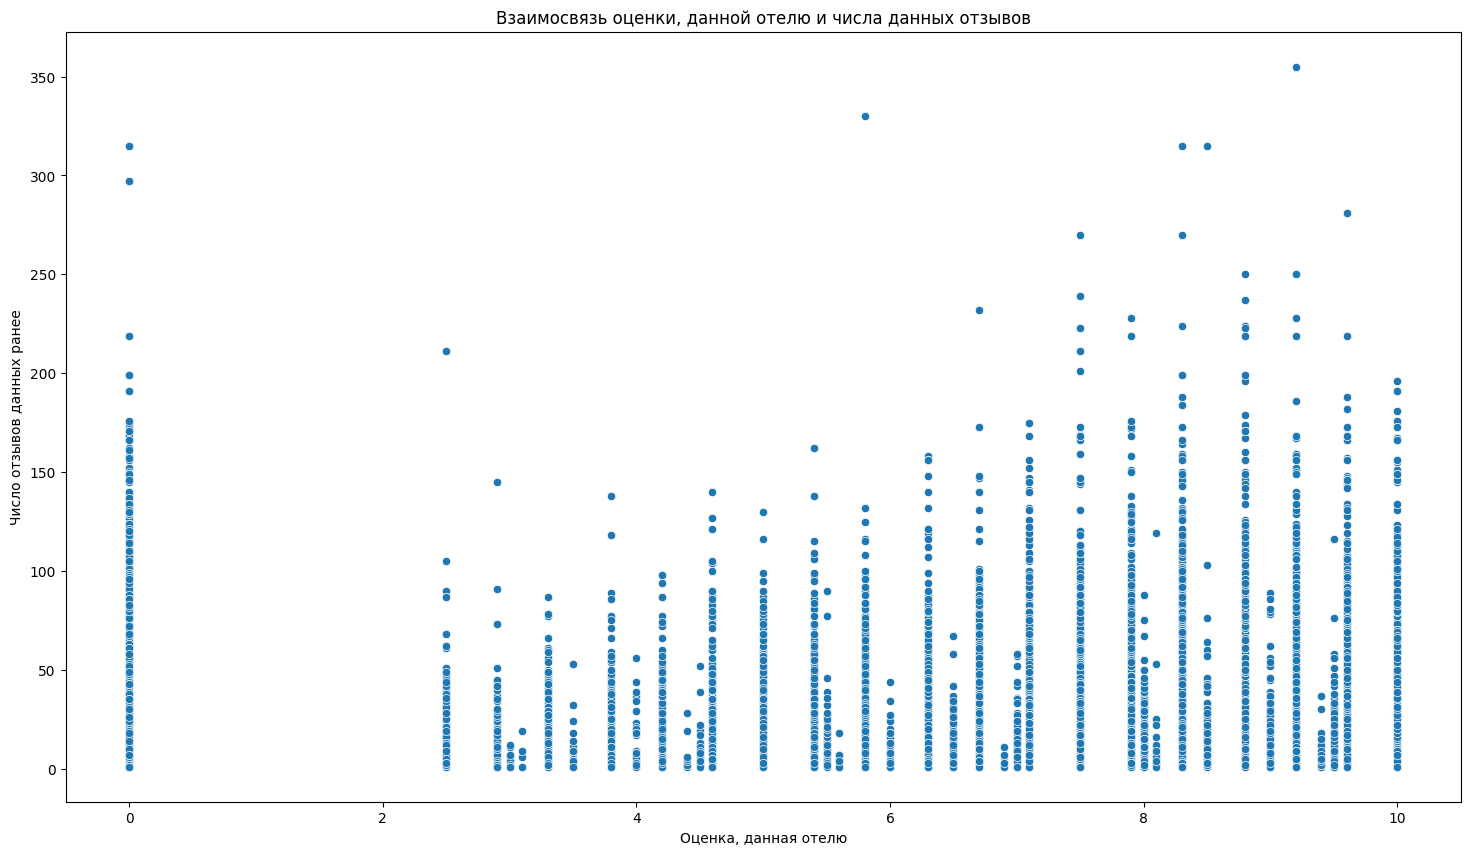

In [289]:
fig = plt.figure(figsize=(18, 10));
scatterplot = sns.scatterplot(data = data, x = 'reviewer_score', y = 'total_number_of_reviews_reviewer_has_given');
scatterplot.set_title('Взаимосвязь оценки, данной отелю и числа данных отзывов');
scatterplot.set_xlabel('Оценка, данная отелю');
scatterplot.set_ylabel('Число отзывов данных ранее');

#### Выводы по визуализации 5

На основании диаграммы рассеяния можно сделать вывод о том, что больше всего отзывов имеют оценку равную нулю. Также можно увидеть, что начиная с оценки равной двум, наблюдается рост количетсва пользователей давших большее количество отзывов за все время. Так, например, среди отзывов с оценкой равной четырем почти нет людей, давших за все время более 100 отзывов, в то время как среди тех, кто дал оценку равную 10 есть люди, давшие за все время от 0 до примерно 200 оценок. 


### Визуализация 6 - взаимосвязь числа тегов и оценки, данной отелю

In [290]:
data['count_of_tags'] = data['tags'].apply(lambda x: x.count("'")*0.5)
# Каждый тег ограничен парой одинарных кавычек. Для подсчета количества достаточно подсчитать кавычки в каждой строке и поделить полученное число на 2

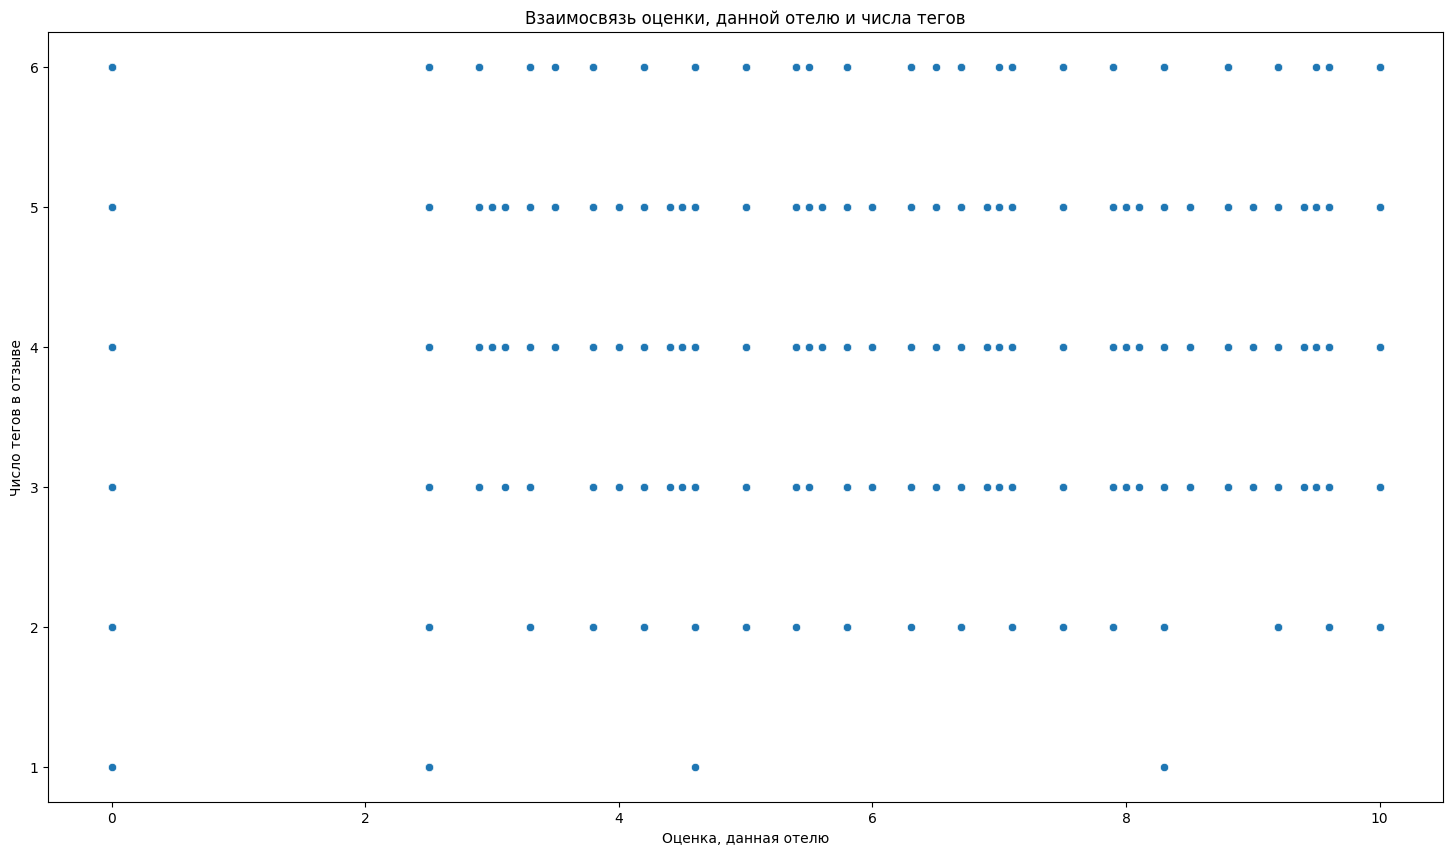

In [291]:
fig = plt.figure(figsize=(18, 10));
scatterplot = sns.scatterplot(data = data, x = 'reviewer_score', y = 'count_of_tags');
scatterplot.set_title('Взаимосвязь оценки, данной отелю и числа тегов');
scatterplot.set_xlabel('Оценка, данная отелю');
scatterplot.set_ylabel('Число тегов в отзыве');
data = data.drop(['count_of_tags'], axis=1)

#### Выводы по визуализации 6

После построения диаграммы рассеяния для признаков оценки отеля и числа тегов в отзыве оказалось, что данные два признака почти не имеют никакой связи. Для почти что каждой оценки есть отзывы с любым из представленным числом тегов. Однако во второй раз можно увидеть, что нет записей об отзывах с оценками от 0 до 2. Возможно, что часть отзывов с оценками 0.0 и более 2.0 являются просто "психологическим округлением человека", когда отзывающийся не готов подсчитать реальную оценку и скорее округляет либо в верхнюю, либо в нижнюю сторону. Например, если оценка отеля близка к 1, то легче поставить 0, поскольку происходит убеждение себя в том, что хороших черт вообще нет. Ровно та же ситуация и с оценками в 10.0, поскольку отделять тонкие значения, как 9.5 и 10.0 - достаточно сложная для мозга задача. 

## Часть 2. Разведывательный анализ данных

### Предсказание на необработанных данных

На данный момент у нас имеется набор данных data - над котором еще не проводился разведывательный анализ данных. Для того, чтобы иметь возможность провести сравнение метрики MAPE до и после разведывательного анализа данных, проведем предсказание на текущем наборе данных.

In [292]:
data2 = data.copy() # Создаем копию данных

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics

# Проводим удаление всех столбцов, содержищих текстовую информацию
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)
    
# Отделяем файл train и test
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)
  
# Выбираем переменные X и y для машинного обучения
y = train_data.reviewer_score.values            
X = train_data.drop(['reviewer_score'], axis=1)
   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED) # Выделяем данные под валидацию - 20%
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED) # Создаём модель
  
# Обучаем модель машинного обучения
model.fit(X_train, y_train)
y_pred = model.predict(X_test)    
    
print('Значение метрики MAPE на данном наборе данных: {}'.format(metrics.mean_absolute_percentage_error(y_test, y_pred)))


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   49.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s


Значение метрики MAPE на данном наборе данных: 0.14134745514916744


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished


На данный момент значение метрики MAPE равняется 14,13%, что является крайне большим значением. Задачей разведывательного анализа данных станет преобразование признаков с целью уменьшения данного значения до менее 13%

### Генерация признаков


Часть из признаков представлена в текстовом виде, поэтому нам необходимо сгенерировать признаки на их основе, чтобы избавиться от текстовых признаков, поскольку модель не может обучаться на текстовых данных

In [294]:
# Выведем информацию о данных
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

У нас имеется 18 признаков, среди которых sample - признак для разделения данных на test и train, поэтому работать с ним мы не будем. Остается 17 уникальных признаков. Выведем только числовые признаки:

In [295]:
object_columns = [s for s in data2.columns if data2[s].dtypes == 'object']
display(data2[object_columns].head())

,hotel_address,review_date,hotel_name,reviewer_nationality,negative_review,positive_review,tags,days_since_review
0,Via Senigallia 6 20161 Milan Italy,7/21/2017,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,Hotel was great clean friendly staff free bre...,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,12/12/2016,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,No Positive,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day
2,Mallorca 251 Eixample 08008 Barcelona Spain,11/26/2015,Alexandra Barcelona A DoubleTree by Hilton,Sweden,Pillows,Nice welcoming and service,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day
3,Piazza Della Repubblica 17 Central Station 201...,10/17/2015,Hotel Principe Di Savoia,United States of America,No Negative,Everything including the nice upgrade The Hot...,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,5/16/2016,Hotel Esther a,United Kingdom,No Negative,Lovely hotel v welcoming staff,"[' Business trip ', ' Solo traveler ', ' Class...",444 day


У нас имеется 8 текстовых признаков. Для начала преобразуем значение даты в числовые признаки. Для этого создадим признаки review_day, review_month, review_year содержащие соответственно день, месяц и год отзыва. После чего избавимся от данного признака

In [296]:
data2['review_day'] = pd.to_datetime(data2['review_date']).dt.day       # получаем дату
data2['review_month'] = pd.to_datetime(data2['review_date']).dt.month   # получаем месяц
data2['review_year'] = pd.to_datetime(data2['review_date']).dt.year     # получаем год

display(data2[['review_day', 'review_month', 'review_year', 'review_date']].head())

,review_day,review_month,review_year,review_date
0,21,7,2017,7/21/2017
1,12,12,2016,12/12/2016
2,26,11,2015,11/26/2015
3,17,10,2015,10/17/2015
4,16,5,2016,5/16/2016


Как видно преобразование прошло успешно, следовательно можно удалить признак __review_date__ из наших данных


In [297]:
data2 = data2.drop(['review_date'], axis=1)

Поработаем с признаком reviewer_nationality. Для этого выведем количество вхождений каждого уникального значения в данные

In [298]:
data2['reviewer_nationality'].value_counts().nlargest(15).sum()

401162

Всего у нас имеется 227 уникальных значений, однако 15 самых популярных дают 401162 значения. Остальные значения заменим на other

In [299]:
popular_nationality = data2['reviewer_nationality'].value_counts()[:15]
data2['reviewer_nationality'] = data2['reviewer_nationality'].apply(lambda x: x if x in popular_nationality else 'Other')

У нас есть 16 значений стран, для того чтобы их закодировать воспользуемся библиотекой __category_encoders__ и классом __OrdinalEncoder__

In [300]:
import category_encoders as ce  # импортируем библиотеку для кодирования информации

ord_encoder = ce.OrdinalEncoder()
data2['reviewer_nationality'] = ord_encoder.fit_transform(data2['reviewer_nationality'])
display(data2.head())

,hotel_address,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,reviewer_score,sample,review_day,review_month,review_year
0,Via Senigallia 6 20161 Milan Italy,904,8.1,Hotel Da Vinci,1,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102,0.0,0,21,7,2017
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,8.6,Urban Lodge Hotel,2,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443,0.0,0,12,12,2016
2,Mallorca 251 Eixample 08008 Barcelona Spain,46,8.3,Alexandra Barcelona A DoubleTree by Hilton,3,Pillows,3,351,Nice welcoming and service,5,15,"[' Business trip ', ' Solo traveler ', ' Twin ...",616 day,41.393192,2.161520,0.0,0,26,11,2015
3,Piazza Della Repubblica 17 Central Station 201...,241,9.1,Hotel Principe Di Savoia,4,No Negative,0,1543,Everything including the nice upgrade The Hot...,27,9,"[' Leisure trip ', ' Couple ', ' Ambassador Ju...",656 day,45.479888,9.196298,0.0,0,17,10,2015
4,Singel 303 309 Amsterdam City Center 1012 WJ A...,834,9.1,Hotel Esther a,1,No Negative,0,4687,Lovely hotel v welcoming staff,7,2,"[' Business trip ', ' Solo traveler ', ' Class...",444 day,52.370545,4.888644,0.0,0,16,5,2016


Займемся признаком days_since_review. В наших данных этот признак представлен в виде "[число дней] [day]" То есть в виде текста, состоящего из двух частей, первая из которых - это число дней, а вторая - слово day. Следовательно выполним преобразование:

In [301]:
data2['days_since_review'] = data2['days_since_review'].apply(lambda x: int(x.split()[0]))

Выведем снова значение столбца, чтобы убедиться, что замена прошла успешно:

In [302]:
data2['days_since_review'].head()

0     13
1    234
2    616
3    656
4    444
Name: days_since_review, dtype: int64

Из описания столбца видно, что данные в нем изменили свой тип данных с 'object' на 'int64'

Теперь займемся столбцом "tags". Всего в данных присутствует более чем 2000 уникальных тегов, следовательно кодирование данного столбца будет достаточно трудоемким. Поэтому вместо кодирования столбца составим новый признак - count_of_tags, который будет отражать число тегов в строке. 

In [303]:
data2['count_of_tags'] = data2['tags'].apply(lambda x: x.count("'")//2) # Каждый тег отделен парой одинарных кавычек, 
# следовательно тегов ровно в два раза меньше чем кавычек

In [304]:
data2 = data2.drop(['tags'], axis=1) # Удаляем столбец с тегами

Поработаем с позитивными и негативными отзывами. Для работы с текстом существует библиотека nltk и модуль SentimentIntensityAnalyzer. С помощью данного модуля возможно получить значение негативного, позитивного, нейтрального оттенка, а также общий результат в тексте: neg, neu, pos, compound. Получим из каждого отзыва как позитивного, так и негативного совокупный балл отзыва, то есть параметр compound. 

Получим признаки: 
1. positive_compound
2. negative_compound

Что позволит в будущем качественнее давать предсказания оценки отеля на основе совокупного балла оценки отзыва

Примечание: изначально планировалось получить все 4 признака для каждого из двух видов отзывов, то есть всего 8 метрик. Однако после попытки реализации оказалось, что время выполнения данного процесса сильно затрудняет работу, из-за чего было принято решение отказать от получения всех оценок в пользу получения совокупного балла обоих отзывов.


In [305]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.downloader.download('vader_lexicon')
sent_analyzer = SentimentIntensityAnalyzer()

data2['positive_compound'] = data2['positive_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])
data2['negative_compound'] = data2['negative_review'].apply(lambda x: sent_analyzer.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Теперь посмотрим на то, как выглядят значения для каждого столбца на примере первых 5 отзывов

In [306]:
display(data2[['positive_compound', 'positive_review', 'negative_compound', 'negative_review']].head())

,positive_compound,positive_review,negative_compound,negative_review
0,0.9615,Hotel was great clean friendly staff free bre...,-0.0554,Would have appreciated a shop in the hotel th...
1,0.3400,No Positive,-0.2960,No tissue paper box was present at the room
2,0.6908,Nice welcoming and service,0.0000,Pillows
3,0.9153,Everything including the nice upgrade The Hot...,-0.7096,No Negative
4,0.7717,Lovely hotel v welcoming staff,-0.7096,No Negative


После перевода текстового отзыва в оценку можно удалить два текстовых столбца 'positive_review' и 'negative_review'

In [307]:
data2 = data2.drop(['positive_review', 'negative_review'], axis=1)

Осталось всего два признака - hotel_name и hotel_address, однако они являются уникальными и поэтому необходимости в их кодировании нет. Следовательно можно избавиться от них

In [308]:
data2 = data2.drop(['hotel_name', 'hotel_address'], axis=1)

In [309]:
# Выведем информацию о данных. На данный момент не должно быть ни одного столбца, содержащего текстовый формат данных
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   reviewer_nationality                        515738 non-null  int64  
 3   review_total_negative_word_counts           515738 non-null  int64  
 4   total_number_of_reviews                     515738 non-null  int64  
 5   review_total_positive_word_counts           515738 non-null  int64  
 6   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 7   days_since_review                           515738 non-null  int64  
 8   lat                                         515738 non-null  float64
 9   lng                                         515738 non-null  float64
 

Проведем повторное обучение модели и получим новое значение метрики MAPE, однако предварительно создадим копию данных для дальнейшей работы

In [310]:
data3 = data2.copy()

train_data = data2.query('sample == 1').drop(['sample'], axis=1)
test_data = data2.query('sample == 0').drop(['sample'], axis=1)
  
# Выбираем переменные X и y для машинного обучения
y = train_data.reviewer_score.values            
X = train_data.drop(['reviewer_score'], axis=1)
   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED) # Выделяем данные под валидацию - 20%
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED) # Создаём модель
  
# Обучаем модель машинного обучения
model.fit(X_train, y_train)
y_pred = model.predict(X_test)    
    
print('Значение метрики MAPE на данном наборе данных: {}'.format(metrics.mean_absolute_percentage_error(y_test, y_pred)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s


Значение метрики MAPE на данном наборе данных: 0.1260624565213601


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished


После этапа генерации признаков значение MAPE уменьшилось до 12.61%. То есть точность модели возросла. В следующей части будет произведен отбор признаков, что также поможет повысить качество модели.

### Отбор признаков

Для отбора признаков, в первую очередь посторим тепловую карту, отражающую корреляцию между всеми признаками в данных

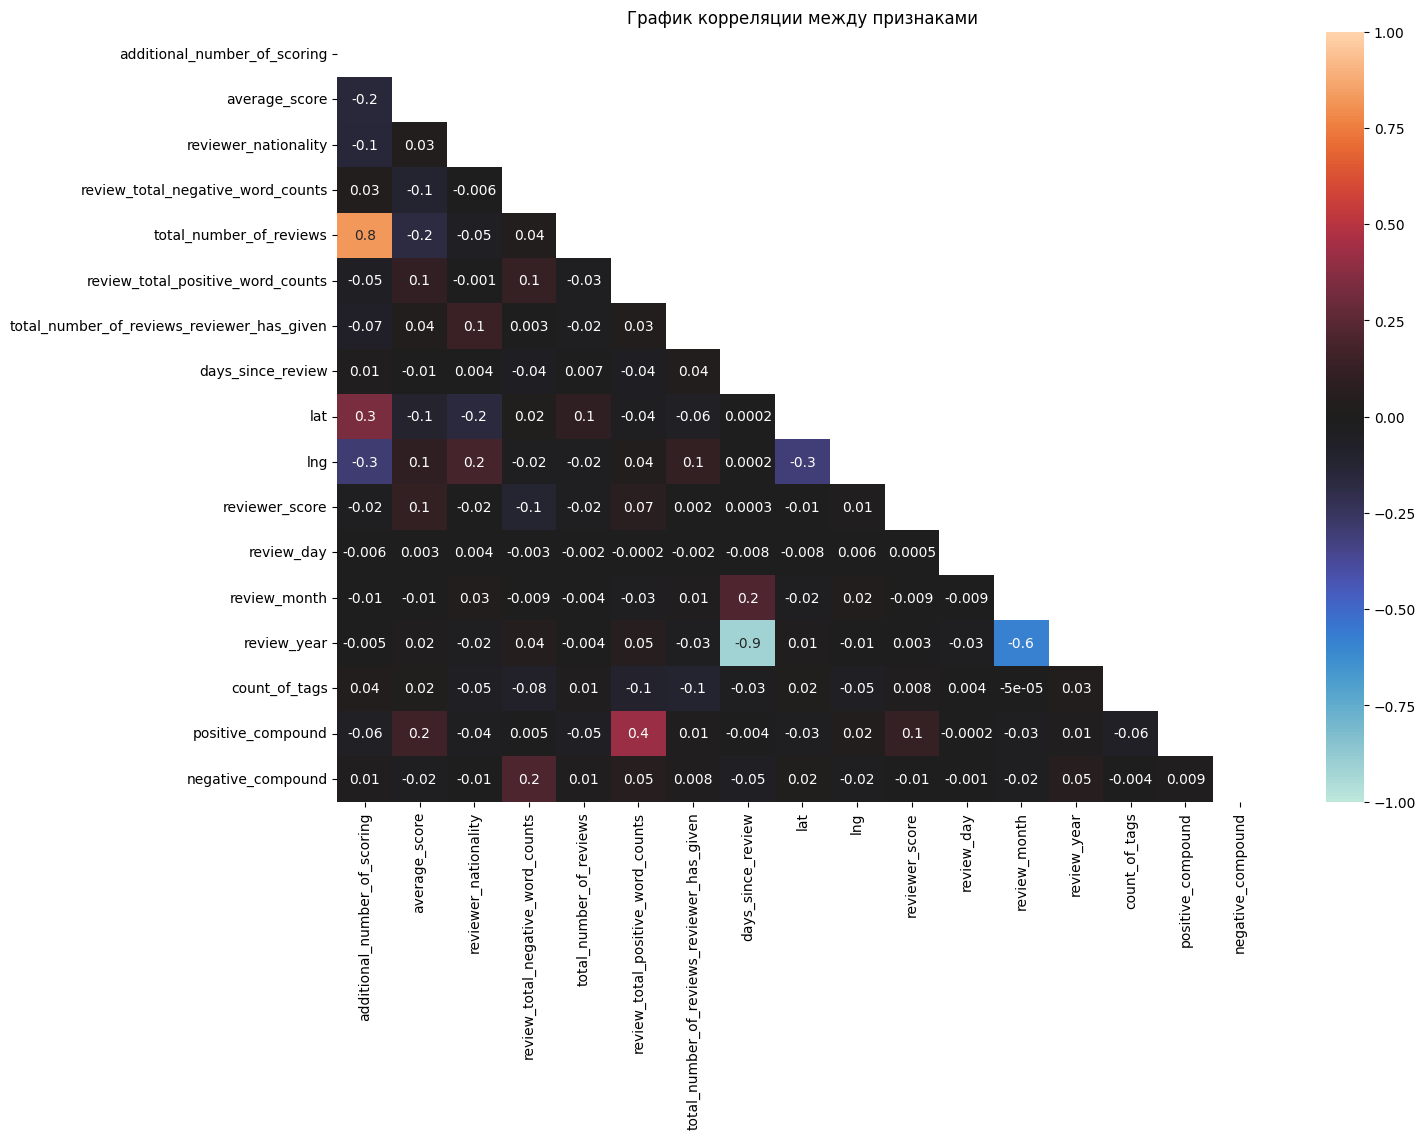

In [311]:
plt.rcParams['figure.figsize'] = (15,10);

matrix = np.triu(data3.drop(['sample'], axis=1).corr(numeric_only=True))
heatmap = sns.heatmap(data3.drop(['sample'], axis=1).corr(), 
                      annot=True,
                      fmt='.1g',
                      vmin=-1,
                      vmax=1,
                      center=0,
                      cmap=None,
                      linewidths=0,
                      linecolor='white',
                      mask=matrix);
heatmap.set_title('График корреляции между признаками');

Как видно из тепловой карты, присутствуют признаки, между которыми наблюдается высокая корреляция. Например у признака __review_month__ наблюдается высокая корреляция с признаком review_year: -0,6. У признака __days_since_review__ имеются две корреляции: с признаком review_year: -0,9 и с признаком review_month: 0,2. Достаточно много ярко выраженных корреляций наблюдается у признаков __additional_number_of_scoring__ и __lng__. Для улучшения качества модели можно удалить данные признаки и построить модель на оставшихся данных. 

In [312]:
data3 = data3.drop(['review_month', 'days_since_review', 'additional_number_of_scoring', 'lng'], axis=1)
print('Выполнено!')

Выполнено!


In [313]:
train_data = data3.query('sample == 1').drop(['sample'], axis=1)
test_data = data3.query('sample == 0').drop(['sample'], axis=1)
  
# Выбираем переменные X и y для машинного обучения
y = train_data.reviewer_score.values            
X = train_data.drop(['reviewer_score'], axis=1)

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED) # Выделяем данные под валидацию - 20%
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED) # Создаём модель
  
# Обучаем модель машинного обучения
model.fit(X_train, y_train)
y_pred = model.predict(X_test)    
    
print('Значение метрики MAPE на данном наборе данных: {}'.format(metrics.mean_absolute_percentage_error(y_test, y_pred)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   29.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s


Значение метрики MAPE на данном наборе данных: 0.12619356443957286


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished


После удаления 4 признаков значение метрики MAPE стало равным 12,62% что не сильно хуже, чем значение этой же метрики до удаления столбцов. Можно сделать вывод, что удаленные столбцы действительно не сильно влияли на значение метрики.

Теперь можно воспользоваться классом feature_importances_ модуля RandomForestRegressor, чтобы узнать какие признаки являются наиболее важными для модели

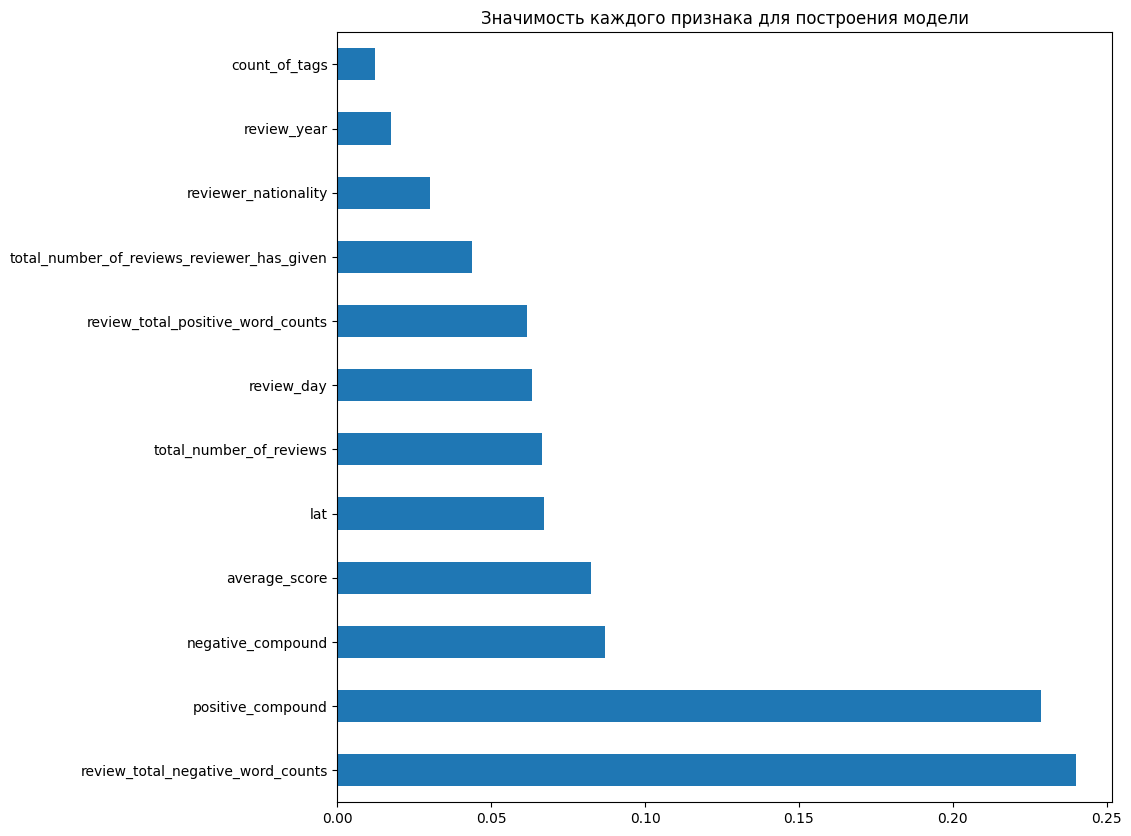

In [315]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh', title='Значимость каждого признака для построения модели');

In [316]:
data3 = data3.drop(['count_of_tags'], axis=1)
print('Выполнено!')

Выполнено!


In [317]:
train_data = data3.query('sample == 1').drop(['sample'], axis=1)
test_data = data3.query('sample == 0').drop(['sample'], axis=1)
  
# Выбираем переменные X и y для машинного обучения
y = train_data.reviewer_score.values            
X = train_data.drop(['reviewer_score'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED) # Выделяем данные под валидацию - 20%
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED) # Создаём модель
  
# Обучаем модель машинного обучения
model.fit(X_train, y_train)
y_pred = model.predict(X_test)    
    
print('Значение метрики MAPE на данном наборе данных: {}'.format(metrics.mean_absolute_percentage_error(y_test, y_pred)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s


Значение метрики MAPE на данном наборе данных: 0.1262757608748175


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.5s finished


После удаления признака числа тегов метрика MAPE стала равняться 12.63% что удовлетворяет условию <13%

# Этап 5. Предсказание оценок отелей и получение итогового решения

После обучения модели, осталось провести предсказание на тестовом наборе данных, после чего вывести результат в виде файла .csv

In [318]:
test_data = test_data.drop(['reviewer_score'], axis=1)
predict_submission = model.predict(test_data)
submission['reviewer_score'] = predict_submission
submission.to_csv('submission_final.csv', index=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.8s finished


Подводя итоги можно сказать, что предсказание метрик при помощи модели машинного обучения зависит в первую очередь от качества входных данных. Метрика MAPE способна определить среднее абсолютное процентное число ошибок в данных. Стоит также указать, что не всегда этап отбора признаков улучшает качество модели. На примере вышеуказанных данных можно убедитья, что модель до отбора признаков показывала ошибку в 12,61%, а после отбора признаков значение увеличилось до 12,63%. Конечно между значениями нет глобальной разницы, однако следует учитывать, что отбор признаков может как улучшить модель, избавив ее от необходимости использовать лишнюю информацию, так и ухудшить ее, сделав ее менее качественной.